Enter the number of rows: 5
Enter the number of columns: 4
Enter start coordinates (x, y): 0,0
Enter goal coordinates (x, y): 4,3
Path found: [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3)]


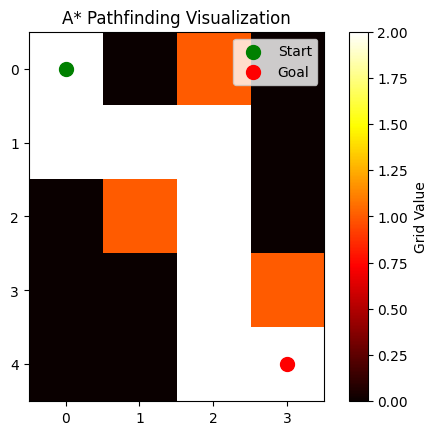

In [13]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
import random

class Node:
    def __init__(self, position, g, h):
        self.position = position  # (x, y)
        self.g = g  # Cost from start node
        self.h = h  # Heuristic to goal node
        self.f = g + h  # Total cost (f = g + h)
        self.parent = None  # Parent node to reconstruct the path

    def __lt__(self, other):
        return self.f < other.f

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, grid, rows, cols):
    start_node = Node(start, 0, heuristic(start, goal))
    goal_node = Node(goal, 0, heuristic(start, goal))

    open_list = []
    closed_list = set()

    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)
        closed_list.add(current_node.position)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Return reversed path

        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4 directions
        for direction in neighbors:
            neighbor_pos = (current_node.position[0] + direction[0], current_node.position[1] + direction[1])

            if 0 <= neighbor_pos[0] < rows and 0 <= neighbor_pos[1] < cols and grid[neighbor_pos[0]][neighbor_pos[1]] != 1:
                if neighbor_pos in closed_list:
                    continue  # Skip if already in closed list

                g = current_node.g + 1  # Cost from start to neighbor
                h = heuristic(neighbor_pos, goal)
                neighbor_node = Node(neighbor_pos, g, h)
                neighbor_node.parent = current_node

                if not any(existing_node.position == neighbor_pos and neighbor_node.f < existing_node.f for existing_node in open_list):
                    heapq.heappush(open_list, neighbor_node)

    return None  # No path found

def draw_grid(grid, path=None, start=None, goal=None):
    grid_copy = np.array(grid)

    if path:
        for p in path:
            grid_copy[p[0], p[1]] = 2

    plt.imshow(grid_copy, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Grid Value')

    if start:
        plt.scatter(start[1], start[0], color='green', s=100, label='Start')
    if goal:
        plt.scatter(goal[1], goal[0], color='red', s=100, label='Goal')

    plt.legend()
    plt.title("A* Pathfinding Visualization")
    plt.show()

# Get grid dimensions from the user
rows = int(input("Enter the number of rows: "))
cols = int(input("Enter the number of columns: "))

# Create an empty grid with the specified dimensions
grid = [[0 for _ in range(cols)] for _ in range(rows)]

# Populate the grid with random obstacles (adjust obstacle density as needed)
obstacle_density = 0.2  # Adjust this value to control obstacle density
for i in range(rows):
    for j in range(cols):
        if random.random() < obstacle_density:
            grid[i][j] = 1

# Get start and goal points from the user
start_input = input("Enter start coordinates (x, y): ")
goal_input = input("Enter goal coordinates (x, y): ")

start = tuple(map(int, start_input.split(',')))
goal = tuple(map(int, goal_input.split(',')))

# Run A* algorithm
path = astar(start, goal, grid, rows, cols)

# Print and visualize the result
if path:
    print("Path found:", path)
    draw_grid(grid, path, start, goal)
else:
    print("No path found.")\